<a href="https://colab.research.google.com/github/JudithVerstegen/SDSS21_opti_tutorial/blob/main/SDSS21_tutorial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Spatial Optimization for Planning and Decision-making Tutorial**
## Spatial Data Science Symposium, 2021

### Session Organizers: Murray Group*, UC Santa Barbara

\*Susan Burtner, Dr. Jing Xu, Jiwon Baik, Seonga Cho, Vanessa Echeverri Figueroa, Evgeny Noi, B. Amelia Pludow, Enbo Zhou

#### Contact Information: sab00@ucsb.edu

<br>

__*To session participants*__: PLEASE make a copy of this Jupyter notebook before making any edits (you must have a Google Drive or GitHub account to do so). Go to `File` > `Save a Copy in Drive` and a copy of this notebook will save to your `Colab Notebooks` folder in your personal Google Drive. If at any point while someone is presenting you have technical questions, please raise your hand or message Evgeny Noi in the chat.

## **Introduction**

In this Jupyter notebook, we explore how to formalize a spatial optimization problem and analyze solutions. By the end of this tutotial, you will\:

1. Identify a spatial optimization problem  
2. Mathematically formalize a spatial optimization problem
3. Operationalize and solve a spatial optimization problem through Python coding and mathematical programming (Xpress)
4. Visualize solutions
5. Be introduced to other method extensions and application areas

***


## **PART I**: What is spatial optimization, and how can we use it?

_Led by Dr. Jing Xu._

Spatial optimization utilizes mathematical and computational approaches to assist decision-making in problems of a geographic nature. It is an interdisciplinary field related to operations research, geography, mathematics, computer science, urban planning, and others. Common applications of spatial optimization include route selection, facility siting, spatial sampling, and land use allocation. Spatial optimization is concerned with maximizing or minimizing an objective, and subjects to some constraints that reflects realistic restrictions or desired conditions. 

Here, we are going to work on the well-know **Knapsack problem**, apply it to forest treatment, and  explore some extensions.

The Knapsack problem examines how to fill a knapsack (like a backpack) and can be explained as follows: given a set of candidate items, where each has its own value and weight, decide which items to pick so that the total value of selected items is maximized while the total weight does not exceed a certain capacity. 


### **Study Area**: Stanislaus National Forest

The context that we are interested in is to select land management units for monitoring and evaluation in Stanislaus National Forest, in order to maximize the total benefit from treatment while not exceeding the capacity of resources and labor. The study area is part of Stanislaus National Forest which is located northern California. 



In [ ]:
#@title Study Area { vertical-output: true }
%%html
<img src="https://raw.githubusercontent.com/sburtner/SDSS21/main/subarea.png"
  alt="Study_Area"
  style="width:450px; height:350px;">

In [ ]:
#@title Stanislaus National Forest { vertical-output: true }
%%html
<img src="https://upload.wikimedia.org/wikipedia/commons/a/ab/Cherry_Lake_Stanislaus_National_Forest.jpg"
  alt="Cherry_Lake_Stanislaus_National_Forest"
  style="width:500px; height:400px;">


Okay, so we have a spatial problem. Now how do we solve it? The method we will use to operationalize our spatial optimization problem is mathematical programming.

### **Introduction to mathematical programming**

Mathematical programming or mathematical optimization applies mathematical models to solve problems for decision-making. It involves the selection and specification of some elements considering some criterion, from some set of available alternatives. Mathematical programming usually has the following form:

$ \textit{Maximize/Minimize} \;\;\;\; f(X_{1},X_{2},X_{3},...,X_{n-1},X_{n}) $

$ \textit{Subject to} \;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;   g_{1}(X_{1},X_{2},X_{3},...,X_{n-1},X_{n}) \le b_{1} \\
\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\; g_{2}(X_{1},X_{2},X_{3},...,X_{n-1},X_{n}) \le b_{2} \\
\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\; g_{3}(X_{1},X_{2},X_{3},...,X_{n-1},X_{n}) \le b_{3} \\
\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\; g_{4}(X_{1},X_{2},X_{3},...,X_{n-1},X_{n}) \le b_{4} \\
\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\; ... \\
\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\; g_{m}(X_{1},X_{2},X_{3},...,X_{n-1},X_{n}) \le b_{m} \\
$

Where $X_{i}, i=1, 2, 3, ..., n$ are decision variables, 
$f$ is the objective function measuring soluton quality, and we optimize $f$ to acquire the best solution. 
$g_{i}, i=1, 2, 3, ..., m$ are mathmatical function to help formalize constraints. 
$b_{i}, i=1, 2, 3, ..., m$ are constants to define constraints. \\




Some **common pragramming problems** include$^{1, 2}$: \\


*   Convex programming studies problems when the objective function $f$ is convex (minimization) or concave (maximization) and the constraint set $g_{i}, i=1, 2, 3, ..., m$ is convex.

*   Linear programming (LP), a special case of convex programming, studies problems when the objective function $f$ is linear and the constraints $g_{i}, i=1, 2, 3, ..., m$ are specified using only linear equalities and inequalities.

*   Integer programming studies linear programing problems where some or all variables are constrained to be integer values.

*   Quadratic programming allows the objective function $f$ to be quadratic, while constraints $g_{i}, i=1, 2, 3, ..., m$  must be linear.



**Solutions to mathematical programming** consist of two types:


*   Exact algorithm, which solves for the optimal solution to a problem with proven optimality.
*   Heuristic algorithm, which consists of a bunch of steps to retrive good solutions in a fast manner. Optimality is not guaranteed.

***

## **PART II**: How do I formalize a spatial optimization problem with specific problem details?

_Led by Su Burtner._

### **Develop an LP for the Stanislaus National Forest**

The following example illustrates the formalization of our spatial optimization problem with integer requirements (1 indicates a land unit is selected, 0 indicates it is not). Recalling the knapsack problem that we talked about previously, let us assume that that the US Forest Service is planning to treat 100 acres (threshold capacity) of the Stanislaus National Forest to decrease wildfire risk. The selected units should be those that maximize the benefit or resilience to wildfire while the threshold capacity is not surpassed. This integer programming problem can be formulated as follows

$ \textit{Maximize} \;\;\;\; \Sigma_{i} \beta_{i} x_{i} $

$ \textit{Subject to} \;\;\;\, \alpha_{i} x_{i} \leq T $

$ \;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\, x_{i} = {0, 1} \; \forall i $

$ \textrm{where} $

$ \;\;\;\;\; i \textrm{ = index of planning units}$

$ \;\;\;\;\; \beta_{i} \textrm{ = benefit of selecting planning unit } i$

$ \;\;\;\;\; \alpha_{i} \textrm{ = contribution of planning unit } i \textrm{ to threshold capacity}$

$\;\;\;\;\; T \textrm{ = threshold capacity}$

$ \textrm{Decision variables: }$

$ \;\;\;\;\; x_{i} = 1 \textrm{ if planning unit } i \textrm{ is selected for intended use; } 0 \textrm{ if not}$                                                                      
<br>

Great, now that we have mathematically formalized our problem, how do go about solving it? We need a solver, and a way to run the solver.      

### **Introduction to optimization solvers**

_Led by Seonga Cho._

Optimization solvers take an instance of a model as input, apply one or more solution methods (such as simplex), and return the results.


Commercial Solvers | Open Source Solvers
--- | ---
Quite expensive, but.. <br> - with free license for educational purposes and academic research <br> - free size-limited student or demo versions| source code freely available 
Usually, all Major Problem Types can be solved <br> (e.g. LP, MILP, QP, MIQP, QCP, MIQCP)| usually a single type of problem, <br> and one solution method are used 

<br>

Commercial solvers are developed with considerable effort and are usually more robust and reliable. They often are quite expensive. Some commercial systems are available with free academic license, under reasonable conditions for educational purposes and academic research. Many offer free size-limited student (or demo) versions for experimentation with small problem instances.  

- [Gurobi](https://www.gurobi.com/products/gurobi-optimizer/)
- [Xpress](https://www.fico.com/en/products/fico-xpress-optimization)
- [Lingo](https://www.lindo.com/index.php/products/lingo-and-optimization-modeling?catid=89&id=88:powerful-lingo-solvers)
- ...

Open source solvers make their source code freely available. Many of these are deployed in the [COIN-OR repository](https://www.coin-or.org/). Many of the open-source solvers are also available as precompiled binaries for the more popular platforms. 


- [SYMPHONY](https://projects.coin-or.org/SYMPHONY#:~:text=SYMPHONY%20is%20an%20open%2Dsource,using%20a%20command%2Dline%20interface.): a COIN_OR project for MILP problems
- [cvxpy](https://www.cvxpy.org/): a Python library for Convex problems 
- ...



### **Integration of a solver into a Jupyter notebook**

_Led by Su Burtner._

For this tutorial, we will be using the Xpress solver to implement our problem. First, let's install the Xpress solver and Geopandas, to read in our spatial data.

In [ ]:
# INSTALL xpress solver
# Other installations (such as from conda) can be used, this is just the simpliest
!pip install xpress

# Install Geopandas
!pip install git+git://github.com/geopandas/geopandas.git

     |████████████████████████████████| 65.6 MB 13 kB/s 
  Cloning git://github.com/geopandas/geopandas.git to /tmp/pip-req-build-p53_x_kj
  Running command git clone -q git://github.com/geopandas/geopandas.git /tmp/pip-req-build-p53_x_kj
     |████████████████████████████████| 15.4 MB 6.9 MB/s 
     |████████████████████████████████| 6.3 MB 34.9 MB/s 
  Created wheel for geopandas: filename=geopandas-0.10.2+16.gee8adfb-py2.py3-none-any.whl size=1031775 sha256=4ba2747ddc80706f3f4965528a1f0a7f468675bc1058f8f9c1bb56fb8366ff91
  Stored in directory: /tmp/pip-ephem-wheel-cache-ab92fmij/wheels/cf/3e/0b/6475054094c2b1ea054158ac1fdcf749fb92f5b512377e4cf8
Successfully built geopandas


Now, import the necessary Python libraries. You get a warning about using an Xpress community license, and that is fine! If your particular modeling scenario calls for more functionality, you may need to upgrade to a different license. More information on FICO© Xpress for Python here: https://www.fico.com/fico-xpress-optimization/docs/latest/solver/optimizer/python/HTML/chIntro_sec_secInstall.html, and the link to the reference manual here: https://www.msi-jp.com/xpress/learning/square/01-python-interface.pdf.

In [ ]:
import xpress as xp
import pandas as pd
import geopandas as gpd
print(gpd.__version__)

Using the Community license in this session. If you have a full Xpress license, first set the XPAUTH_PATH environment variable to the full path to your license file, xpauth.xpr, and then restart Python. If you want to use the FICO Community license and no longer want to see this message, set the XPAUTH_PATH environment variable to: /usr/local/lib/python3.7/dist-packages/xpress/license/community-xpauth.xpr
NB: setting XPAUTH_PATH will also affect any other Xpress products installed on your system.
0.10.2+16.gee8adfb


We can run command line tools to better understand our Python environment. Below, the `ls` command will list the files in the given directory.

In [ ]:
!ls

sample_data


The output should be `sample_data`, which is the sample data that comes with a Colab notebook, demonstrating that we haven't imported our data yet! Let's do that now.

In [ ]:
!wget https://raw.githubusercontent.com/sburtner/SDSS21/main/knapsack_example.geojson

--2021-12-13 14:21:16--  https://raw.githubusercontent.com/sburtner/SDSS21/main/knapsack_example.geojson
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 22469 (22K) [text/plain]
Saving to: ‘knapsack_example.geojson’

knapsack_example.ge 100%[===================>]  21.94K  --.-KB/s    in 0.001s  

2021-12-13 14:21:17 (33.2 MB/s) - ‘knapsack_example.geojson’ saved [22469/22469]



In [ ]:
!ls

knapsack_example.geojson  sample_data


After running `ls` again, we can now see that the data for our problem, `knapsack_example.geojson`, has been imported! Note, if you are working with a shapefile, it would be a similar process to bring in the data with other Python methods. Geojson offers the convenience of containing the projection and other shape format information all in one file.


Let's read in the data and see what it looks like.

In [ ]:
gdf = gpd.read_file('knapsack_example.geojson')
print(gdf.shape)
gdf.head()

(16, 8)


,CSO_depart,CSOterr_ID,CNSM_NoMGT,Acres,LMU_ID,res_d_STND,res_d_SPM,geometry
0,0.833334,164,172765.0,5.337479,35564,0.921725,14.163780,"MULTIPOLYGON (((757755.000 4243875.000, 757725..."
1,0.565610,164,1757300.0,27.354568,36492,1.304450,20.044963,"MULTIPOLYGON (((756915.000 4243875.000, 756975..."
2,0.585455,164,3106670.0,48.926867,36493,1.220160,18.749712,"MULTIPOLYGON (((756735.000 4243545.000, 756765..."
3,0.590000,164,1042850.0,15.790036,36494,0.687985,10.571991,"MULTIPOLYGON (((756465.000 4243695.000, 756435..."
4,0.652973,164,435944.0,8.228611,36964,1.695560,26.054994,"MULTIPOLYGON (((757425.000 4243665.000, 757425..."


Awesome, that worked. We won't use some of the columns, but the ones we will use include:

* `Acres` - necsesary for summing our capacity
* `LMU_ID` - the identification value for each land unit
*  `res_d_SPM` - an aggregate measure of the benefit of the land unit

<br>

Now we can create our linear program (LP). Let's start by making the decision variables.

In [ ]:
# CREATE DECISON VARIABLES
x_i = [xp.var(i, vartype=xp.binary) for i in gdf['LMU_ID'].astype(str)]

print("The following decision variables have been created for each LMU ID:")
print([x.name for x in x_i])

The following decision variables have been created for each LMU ID:
['35564', '36492', '36493', '36494', '36964', '36969', '37505', '37507', '37508', '37509', '37510', '37511', '38060', '38061', '38062', '38063']


Next, we will create our objective function.

In [ ]:
# CREATE THE OBJECTIVE
Beta_i = gdf['res_d_SPM']
Z = xp.Sum(Beta_i * x_i)

print("The following objective function has been created:")
print(Z)

The following objective function has been created:
 14.1638 35564 +20.045 36492 +18.7497 36493 +10.572 36494 +26.055 36964 +11.8661 36969 +22.3842 37505 +25.3076 37507 +26.7496 37508 +26.5974 37509 +14.5147 37510 +15.4938 37511 +20.6054 38060 +20.6393 38061 +16.7596 38062 +16.7269 38063


Next, we will create the constraint.

In [ ]:
# CREATE THE CONSTRAINT(S)
alpha_i = gdf['Acres']
c1 = xp.Sum(alpha_i * x_i) <= 100

print("The following constraint has been created:")
print(c1.body)

The following constraint has been created:
 5.33748 35564 +27.3546 36492 +48.9269 36493 +15.79 36494 +8.22861 36964 +5.33748 36969 +22.6843 37505 +18.014 37507 +20.4603 37508 +23.3515 37509 +20.2379 37510 +2.66874 37511 +6.89424 38060 +19.7931 38061 +19.3484 38062 +30.6905 38063


Finally, we will create the problem itself, and add all of our decision variables and constraint(s).

In [ ]:
# CREATE THE PROBLEM
p = xp.problem()

# ADD THE DECISION VARIABLES
p.addVariable(x_i)

# ADD CONSTRAINTS
p.addConstraint(c1)
# Already ensured x_i is binary in its instantiation

We are now ready to solve the problem!

In [ ]:
# SOLVE THE PROBLEM
p.setObjective(Z, sense=xp.maximize)
p.solve()

FICO Xpress v8.13.1, Community, solve started 14:30:02, Dec 13, 2021
Heap usage: 334KB (peak 334KB, 288KB system)
Maximizing MILP noname using up to 2 threads, with these control settings:
OUTPUTLOG = 1
Original problem has:
         1 rows           16 cols           16 elements        16 globals
Presolved problem has:
         1 rows           16 cols           16 elements        16 globals
Presolve finished in 0 seconds
Heap usage: 362KB (peak 366KB, 290KB system)

Coefficient range                    original                 solved        
  Coefficients   [min,max] : [ 2.67e+00,  4.89e+01] / [ 8.34e-02,  1.53e+00]
  RHS and bounds [min,max] : [ 1.00e+00,  1.00e+02] / [ 1.00e+00,  3.12e+00]
  Objective      [min,max] : [ 1.06e+01,  2.67e+01] / [ 1.06e+01,  2.67e+01]
Autoscaling applied standard scaling

Will try to keep branch and bound tree memory usage below 11.3GB
 *** Solution found:      .000000   Time:   0    Heuristic: T ***
 *** Solution found:   104.739705   Time:   0    H

What was the total benefit derived?

In [ ]:
print("The total benefit derived is:")
print(p.getObjVal())

The total benefit derived is:
166.83865999999995


In [ ]:
%%html
<marquee style='width: 30%; color: blue;'><b> Pause! Pause! Pause! Pause! Pause! Pause! Pause! Pause! Pause! Pause! Pause! Pause! Pause! Pause! Pause! Pause! Pause! Pause! Pause! Pause! Pause! Pause!</b></marquee>

Before we jump ahead to visualizing our problem solutions, let's take some time to talk about other extensions and application areas.

### **Bi or multi-objective extensions**

_Led by Seonga Cho._

Most of the real-world problems are based on multiple objectives. The multi-objective optimization started from this inherent characteristics of real-world problems. The optimization problem has been extended through the inclusion of multiple objectives in one optimization problem. And one of the important characteristics is that these multiple objectives cannot be combined or integrated as one objective. For example, (1) protecting property and (2) protecting people can be two major objectives (Church and Murray, 2018) in fire protection services. And most real-world problem contains a complicated relationship between multiple objectives like the example. 

![mo_graph.png](https://raw.githubusercontent.com/sburtner/SDSS21/main/tradeoff_curve.png)

As shown above, the optimal solution of two objectives cannot be achieved at the same time. The result of the multi-objective optimization problem is usually visualized as a Pareto frontier. The graph below shows that there is a trade-off relationship between (1) covered property and (2) covered people. As a result, the non-dominated solution sets from all of the solutions are called a Pareto frontier.


### **Other application areas**

The model we've been discussing is spatial, because we're considering units in space, but there are lots of other spatial relationships we could consider. For example, selected units could need to be contiguous (so the selection is a patch). We could also select several patches (Murray et al., in revision).

![patch.png](https://raw.githubusercontent.com/sburtner/SDSS21/main/patch.png)

We could prefer (or require) that selections be near each other or dispersed. For example, if undesirable facilities are being sited, we may want to ensure that they are spread out and not clustered in a single area (Murray et al., 2005). Alternatively, if there are spillover benefits to facility siting or location treatment, neighboring units may not need to be treated, as in the case of some wildfire mitigation treatments.

![fire.png](https://raw.githubusercontent.com/sburtner/SDSS21/main/fire.png)


All of these spatial relationships (and more!) can be encouraged (via the objective function) or required (via constraints).

We don't have time to explore these method extensions and other application areas, that was just a taste of what you can do with spatial optimization! Okay, now let's get back to visualizing our problem solutions.

***

## **PART III**: Generate and visualize results

_Led by Su Burtner._

We have run the Xpress solver to get the land units that will maximize benefit without going over capacity, but we need to know which ones they are so we can map them and visualize the selections simultaneously.

Once the optimal solutions have been identified we can extract those from our solver and plot those on a map. Here is a quick workflow: 

1. Extract the LMU_IDs for the parcels where $x_i=1$ (denotes selected parcels); 
2. Subset the original geopandas dataframe with selected LMU_ID; 
3. Plot this data on a map using Geopandas plotting functionality.  

### __Get solutions__

In [ ]:
# GET SOLUTIONS
var_solutions = [x.name for x in x_i if p.getSolution(x) == 1]

print("The selected LMU_IDs are:")
print(var_solutions)

The selected LMU_IDs are:
['35564', '36964', '36969', '37507', '37508', '37509', '37511', '38060']


To visualize the selected units, we need to import some other mapping and visualization libraries (we will install those now).

In [ ]:
%%time 

# Important library for many geopython libraries
!apt install gdal-bin python-gdal python3-gdal 
# Install rtree - Geopandas requirment
!apt install python3-rtree 
# Install descartes - Geopandas requirment
!pip install descartes 
# Install Folium for Geographic data visualization
!pip install folium
# Install MapClassify 
!pip install -U mapclassify

Reading package lists... Done
Building dependency tree       
Reading state information... Done
gdal-bin is already the newest version (2.2.3+dfsg-2).
python-gdal is already the newest version (2.2.3+dfsg-2).
The following additional packages will be installed:
  python3-numpy
Suggested packages:
  python-numpy-doc python3-nose python3-numpy-dbg
The following NEW packages will be installed:
  python3-gdal python3-numpy
0 upgraded, 2 newly installed, 0 to remove and 37 not upgraded.
Need to get 2,288 kB of archives.
After this operation, 13.2 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/main amd64 python3-numpy amd64 1:1.13.3-2ubuntu1 [1,943 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic/universe amd64 python3-gdal amd64 2.2.3+dfsg-2 [346 kB]
Fetched 2,288 kB in 2s (1,439 kB/s)
Selecting previously unselected package python3-numpy.
(Reading database ... 155222 files and directories currently installed.)
Preparing to unpack .../python3-numpy_

In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
import numpy as np
import folium

Before we map, we can also quality-check our data.

In [ ]:
# Check if there are nulls/missing values in data 
#np.sum(gdf.isnull())
gdf.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 16 entries, 0 to 15
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   CSO_depart  16 non-null     float64 
 1   CSOterr_ID  16 non-null     int64   
 2   CNSM_NoMGT  16 non-null     float64 
 3   Acres       16 non-null     float64 
 4   LMU_ID      16 non-null     int64   
 5   res_d_STND  16 non-null     float64 
 6   res_d_SPM   16 non-null     float64 
 7   geometry    16 non-null     geometry
dtypes: float64(5), geometry(1), int64(2)
memory usage: 1.1 KB


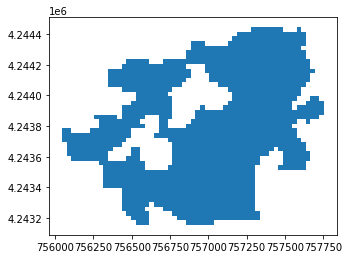

In [ ]:
gdf.plot() # Make sure it is plottable

### __Visualizing results with a custom function__

Let's write a function that will plot the spatial layer and highlight the selected units with hatching. This function will create a choropleth map with different colors corresponding to different values of associated benefit. 

In [ ]:
# Plotting function

def plot_objective_value(path_to_shapefile: str, obj_var: str, selected_ids = [], save_fig_path=None, choro_type='classification', save_fig=False):
  """
  Given a path to shapefile (path_to_shapefile) and a name of variable storing 
  the name of a variable (obj_var) creates a choropleth map which is  
  either classified via discrete classes scale (default) or via continuous scale. 
  Make sure to supply a POLYGON geometry type and a plot title.  

  Arguments: 
  path_to_shapefile   [string]
  obj_var             [string]
  save_fig_path       [string]
  choro_type          [string]
  save_fig            [bool]
  selected_ids        [list]

  THINGS TO ADD: 
  Given the id-s of a shapefile, highlight the area selected by the 
  knapsack algorithm

  """

  # make sure the save arguments are supplied 
  if save_fig and save_fig_path is None:
    raise ValueError("save_fig_path is not defined")
  
  gdf = gpd.read_file(path_to_shapefile) 
  
  # add outline 
  if len(selected_ids)>0:
    mysel = gdf.loc[gdf.LMU_ID.isin(selected_ids),]

  fig, ax = plt.subplots(figsize=(16,10))

  if choro_type=='classification':
    gdf.plot(column=obj_var, ax=ax, legend=True, scheme='quantiles', \
             legend_kwds={'loc': 'lower right'})
    gdf.plot(color='None', edgecolor='k', ax=ax) # add boundaries 
    if len(selected_ids)>0:
      mysel = gdf.loc[gdf.LMU_ID.isin(selected_ids),]
      mysel.plot(color='None', edgecolor='r', linewidth=5, ax=ax, hatch='///') # add highlight
    ax.set_title(obj_var, fontsize=18)

  else:
    divider = make_axes_locatable(ax1)
    cax = divider.append_axes("right", size="5%", pad=0.1)
    
    gdf.plot(column=obj_var, legend=True, ax=ax, cax=cax)
    gdf.plot(color='None', edgecolor='k', ax=ax) # add boundaries 
    if len(selected_ids)>0:
      mysel = gdf.loc[gdf.LMU_ID.isin(selected_ids),]
      mysel.plot(color='None', edgecolor='r', linewidth=5, ax=ax, hatch='///') # add highlight
    ax.set_title(obj_var, fontsize=18)

  # save figure 
  if save_fig:
    print(f"file saved to {save_fig_path}")
    fig.savefig(save_fig_path)

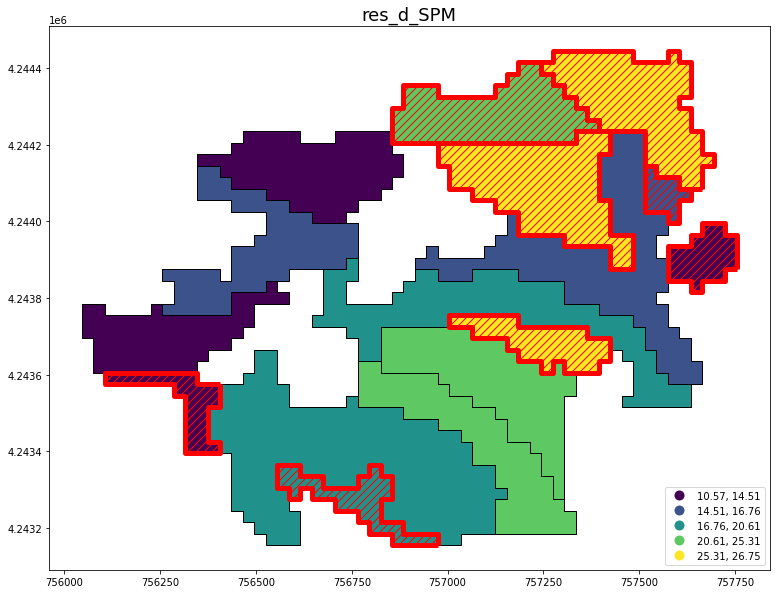

In [ ]:
plot_objective_value('knapsack_example.geojson', 'res_d_SPM', selected_ids=var_solutions)

Above, you can see the parameter `obj_var` is passed the argument "res_d_SPM" and the `selected_ids` parameter is given our solutions, the object "var_solutions."

You can also see that the plot visualizes both the benefit associated with each land unit (dark purple / top legend item corresponds to a lower value range, yellow / lower legend item corresponds to a high value range). Hatching is overlayed on the land units selected for treatment. Below, we can generate and save the plot.

file saved to my_choro_map.jpeg


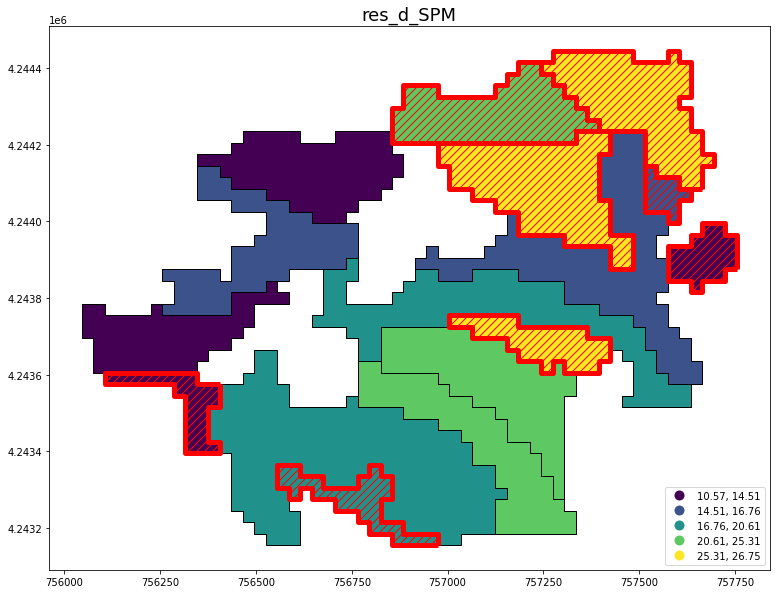

In [ ]:
# Generate and save the plot
plot_objective_value('knapsack_example.geojson', 'res_d_SPM', save_fig_path='my_choro_map.jpeg', save_fig=True, selected_ids=var_solutions)

That is it! With the given solutions and visualizations, further analysis and decision-making can follow.

***

## **PART IV**: Try it on your own

Now that you have seen all of the pieces of formalizing and solving a spatial optimization problem, try to expand it on your own. Some questions you could try to answer:

1. How will the problem change if the threshold capacity is switched to 80 units?
2. What if we allow portions of the land units to be treated, how do we modify the problem?
3. What types of constraints might be add, and what would they look like (both mathematically and in Xpress / Python)?

You could also try another type of problem, here, the transportation problem$^{3}$.

4. How would you implement the following?

$ \textit{Minimize} \;\;\;\; \Sigma_{i=1}^{m} \Sigma_{j=1}^{n} c_{ij} x_{ij} $

$ \textit{Subject to} \;\;\; \Sigma_{j=1}^{n} x_{ij} \leq s_{i} \; \forall i $

$ \;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\; \Sigma_{i=1}^{m} x_{ij} \geq d_{j} \; \forall j $

$ \;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\, x_{ij} \geq 0 \; \forall i,j $

$ \textrm{where} $

$ \;\;\;\;\; i \textrm{ = index of supply locations}$

$ \;\;\;\;\; j \textrm{ = index of demand locations}$

$ \;\;\;\;\; x_{ij} \textrm{ = number of units allocated from } i \textrm{ to } j $

$ \;\;\;\;\; c_{ij} \textrm{ = cost of transporting one unit from supply } i \textrm{ to demand } j$

$ \;\;\;\;\; d_{j} \textrm{ = amount requested by demand } j $

$ \;\;\;\;\; s_{i} \textrm{ = amount of goods available by supply } i $

Data:


In [ ]:

Supply_cities = ["AlbertLea", "Eugene", "Bellingham"]
Supply = {"AlbertLea": 100.0, "Eugene": 125.0, "Bellingham": 75.0}

Demand_cities = ["Sacramento", "Albuquerque", "RapidCity", "SaltLakeCity"]
Demand = {"Sacramento": 80.0, "Albuquerque": 85.0, "RapidCity": 70.0, "SaltLakeCity":65.0}

Cost = {("AlbertLea", "Sacramento"): 0.01101366431, ("AlbertLea", "Albuquerque"): 0.04860825103, ("AlbertLea", "RapidCity"): 0.13705260459, ("AlbertLea", "SaltLakeCity"): 0.03138397400,
        ("Eugene", "Sacramento"): 0.81523705084, ("Eugene", "Albuquerque"): 0.04202275424, ("Eugene", "RapidCity"): 0.03178196957, ("Eugene", "SaltLakeCity"): 0.13809010191,
        ("Bellingham", "Sacramento"): 0.16745819559, ("Bellingham", "Albuquerque"): 0.02805435047, ("Bellingham", "RapidCity"): 0.02811501259, ("Bellingham", "SaltLakeCity"): 0.08829851538
}

***

### **References**
1. Frederick, S., and G. Lieberman. _Introduction to Operations Research_. (2001).
2. Boyd, S., and L. Vandenberghe. _Convex optimization_. Cambridge University Press (2004).

3. Church, R.L. and A.T. Murray. _Business Site Selection, Location Analysis and GIS_. New York: Wiley (2009).

4. Church, R. L. and Murray, A. _Location Covering Models_. Springer (2018).